In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024


In [68]:
direct = 'spring_2025/detdeta_final_calib/reweighting_effects'

In [335]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
cent = cents[6]

lowbound = {'0-5': 500, '5-10':400, '10-20':300, '20-30':190, '30-40':140, '40-50':85, '50-60':50}
highbound = {'0-5': 1000, '5-10':800, '10-20':600, '20-30':410, '30-40':250, '40-50':162, '50-60':95}
#lowbound = {'0-5': 300, '5-10':200, '10-20':100, '20-30':100, '30-40':0, '40-50':0, '50-60':0}
#highbound = {'0-5': 1100, '5-10':1000, '10-20':800, '20-30':600, '30-40':500, '40-50':300, '50-60':200}
starmean = {'0-5': 620, '5-10':515, '10-20':402, '20-30':279, '30-40':187, '40-50':118, '50-60':70}
phenixmean = {'0-5': 599, '5-10':498.7, '10-20':367.8, '20-30':248.5, '30-40':162.7, '40-50':101.1, '50-60':58.6}
staruncert = {'0-5': 33, '5-10':28, '10-20':21, '20-30':15, '30-40':10, '40-50':6, '50-60':4}
phenixuncert = {'0-5': 24.7, '5-10':28.9, '10-20':23.1, '20-30':17.5, '30-40':13.5, '40-50':9.8, '50-60':7.4}

leg_labels = ['Reweight EPOS','EPOS','Reweight AMPT','AMPT']
reweight_leg_labels = ['Reweight EPOS/EPOS','Reweight AMPT/AMPT','Reweight EPOS/Reweight AMPT']

emcal_correction = []
hcal_correction = []
calo_correction = []

f1 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_epos_2024.root')
emcal_correction.append(TH1F(f1.Get("h_emcal_correction")))
calo_correction.append(TH1F(f1.Get("h_calo_correction")))
hcal_correction.append(TH1F(f1.Get("h_hcal_correction")))
emcal_correction[0].SetDirectory(0)
calo_correction[0].SetDirectory(0)
hcal_correction[0].SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_epos_2024.root')
emcal_correction.append(TH1F(f2.Get("h_emcal_correction")))
calo_correction.append(TH1F(f2.Get("h_calo_correction")))
hcal_correction.append(TH1F(f2.Get("h_hcal_correction")))
emcal_correction[1].SetDirectory(0)
calo_correction[1].SetDirectory(0)
hcal_correction[1].SetDirectory(0)
f2.Close()
f3 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_ampt_2024.root')
emcal_correction.append(TH1F(f3.Get("h_emcal_correction")))
calo_correction.append(TH1F(f3.Get("h_calo_correction")))
hcal_correction.append(TH1F(f3.Get("h_hcal_correction")))
emcal_correction[2].SetDirectory(0)
calo_correction[2].SetDirectory(0)
hcal_correction[2].SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_ampt_2024.root')
emcal_correction.append(TH1F(f4.Get("h_emcal_correction")))
calo_correction.append(TH1F(f4.Get("h_calo_correction")))
hcal_correction.append(TH1F(f4.Get("h_hcal_correction")))
emcal_correction[3].SetDirectory(0)
calo_correction[3].SetDirectory(0)
hcal_correction[3].SetDirectory(0)
f4.Close()

In [336]:
rgb = [[230, 25, 75], [60, 180, 75], [255, 225, 25], [0, 130, 200], [245, 130, 48], [145, 30, 180], [70, 240, 240], [240, 50, 230], [210, 245, 60], [250, 190, 212], [0, 128, 128], [220, 190, 255], [170, 110, 40], [255, 250, 200], [128, 0, 0], [170, 255, 195], [128, 128, 0], [255, 215, 180], [0, 0, 128], [128, 128, 128], [34, 139, 34], [0, 0, 0]]
colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/emcal_corr_50-60.png has been created


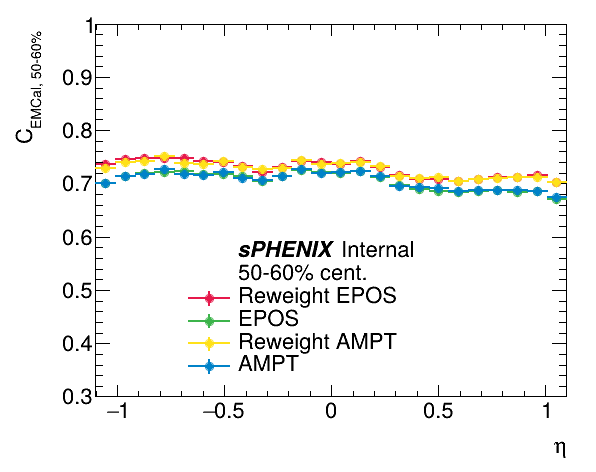

In [337]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(emcal_correction)):
    leg.AddEntry(emcal_correction[i],leg_labels[i],"lep")
    emcal_correction[i].SetLineColor(colors[i])
    emcal_correction[i].SetMarkerColor(colors[i])
    emcal_correction[i].SetMarkerStyle(20)
    emcal_correction[i].SetStats(0)
    if i == 0:
        emcal_correction[i].SetYTitle("C_{EMCal, "+cent+"%}")
        emcal_correction[i].SetXTitle("#eta")
        emcal_correction[i].GetYaxis().SetRangeUser(0.3,1)
        emcal_correction[i].Draw()
    else:
        emcal_correction[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_corr_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/hcal_corr_50-60.png has been created


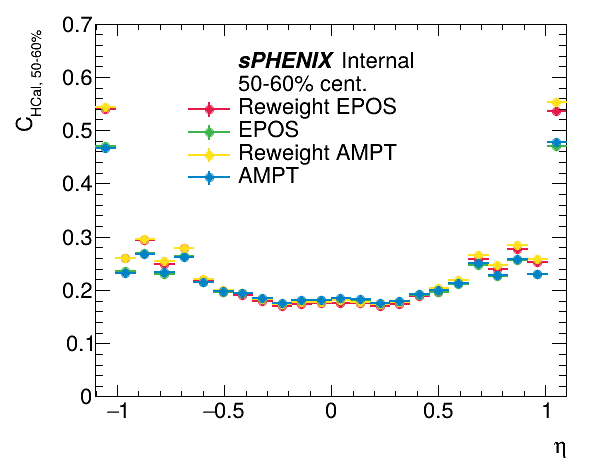

In [338]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(hcal_correction)):
    leg.AddEntry(hcal_correction[i],leg_labels[i],"lep")
    hcal_correction[i].SetLineColor(colors[i])
    hcal_correction[i].SetMarkerColor(colors[i])
    hcal_correction[i].SetMarkerStyle(20)
    hcal_correction[i].SetStats(0)
    if i == 0:
        hcal_correction[i].SetYTitle("C_{HCal, "+cent+"%}")
        hcal_correction[i].SetXTitle("#eta")
        hcal_correction[i].GetYaxis().SetRangeUser(0,0.7)
        hcal_correction[i].Draw()
    else:
        hcal_correction[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_corr_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/calo_corr_50-60.png has been created


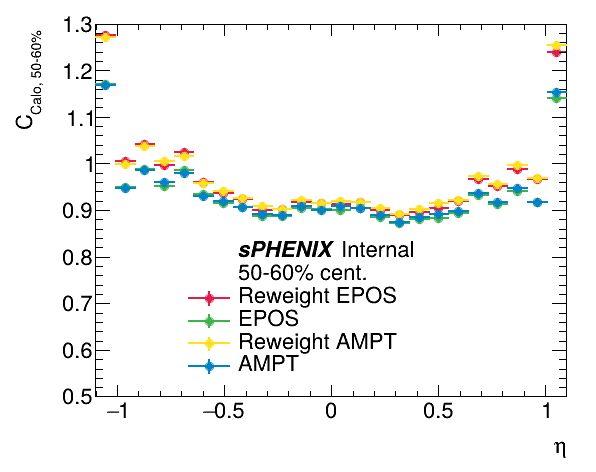

In [339]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(calo_correction)):
    leg.AddEntry(calo_correction[i],leg_labels[i],"lep")
    calo_correction[i].SetLineColor(colors[i])
    calo_correction[i].SetMarkerColor(colors[i])
    calo_correction[i].SetMarkerStyle(20)
    calo_correction[i].SetStats(0)
    if i == 0:
        calo_correction[i].SetYTitle("C_{Calo, "+cent+"%}")
        calo_correction[i].SetXTitle("#eta")
        calo_correction[i].GetYaxis().SetRangeUser(0.5,1.3)
        calo_correction[i].Draw()
    else:
        calo_correction[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_corr_'+cent+'.png')

In [340]:
emcal_ratio = []
hcal_ratio = []
calo_ratio = []
for i in range(0,4,2):
    emcal_ratio.append(emcal_correction[i].Clone(f"emcal_ratio_{i}"))
    emcal_ratio[-1].Divide(emcal_correction[i+1])
    hcal_ratio.append(hcal_correction[i].Clone(f"hcal_ratio_{i}"))
    hcal_ratio[-1].Divide(hcal_correction[i+1])
    calo_ratio.append(calo_correction[i].Clone(f"calo_ratio_{i}"))
    calo_ratio[-1].Divide(calo_correction[i+1])
emcal_ratio.append(emcal_correction[0].Clone("emcal_ratio_3"))
emcal_ratio[-1].Divide(emcal_correction[2])
hcal_ratio.append(hcal_correction[0].Clone("hcal_ratio_3"))
hcal_ratio[-1].Divide(hcal_correction[2])
calo_ratio.append(calo_correction[0].Clone("calo_ratio_3"))
calo_ratio[-1].Divide(calo_correction[2])

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/emcal_ratio_50-60.png has been created


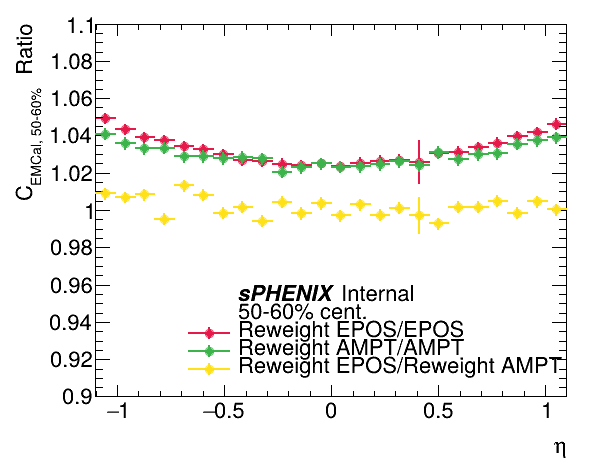

In [341]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.2,.7,.39)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(emcal_ratio)):
    leg.AddEntry(emcal_ratio[i],reweight_leg_labels[i],"lep")
    emcal_ratio[i].SetLineColor(colors[i])
    emcal_ratio[i].SetMarkerColor(colors[i])
    emcal_ratio[i].SetMarkerStyle(20)
    emcal_ratio[i].SetStats(0)
    if i == 0:
        emcal_ratio[i].SetYTitle("C_{EMCal, "+cent+"%} Ratio")
        emcal_ratio[i].SetXTitle("#eta")
        emcal_ratio[i].GetYaxis().SetRangeUser(0.9,1.1)
        emcal_ratio[i].Draw()
    else:
        emcal_ratio[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/hcal_ratio_50-60.png has been created


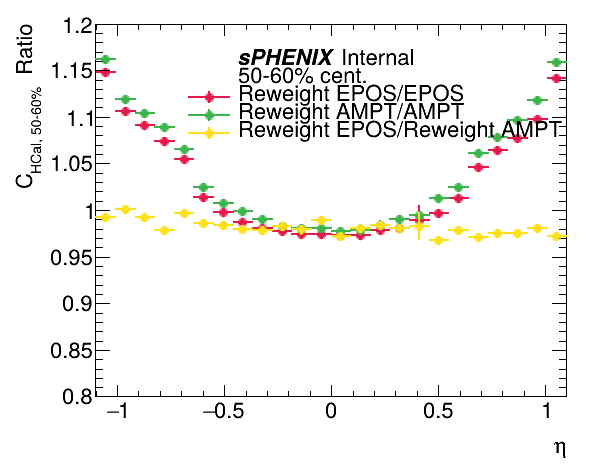

In [342]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.7,.7,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(hcal_ratio)):
    leg.AddEntry(hcal_ratio[i],reweight_leg_labels[i],"lep")
    hcal_ratio[i].SetLineColor(colors[i])
    hcal_ratio[i].SetMarkerColor(colors[i])
    hcal_ratio[i].SetMarkerStyle(20)
    hcal_ratio[i].SetStats(0)
    if i == 0:
        hcal_ratio[i].SetYTitle("C_{HCal, "+cent+"%} Ratio")
        hcal_ratio[i].SetXTitle("#eta")
        hcal_ratio[i].GetYaxis().SetRangeUser(0.8,1.2)
        hcal_ratio[i].Draw()
    else:
        hcal_ratio[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_final_calib/reweighting_effects/calo_ratio_50-60.png has been created


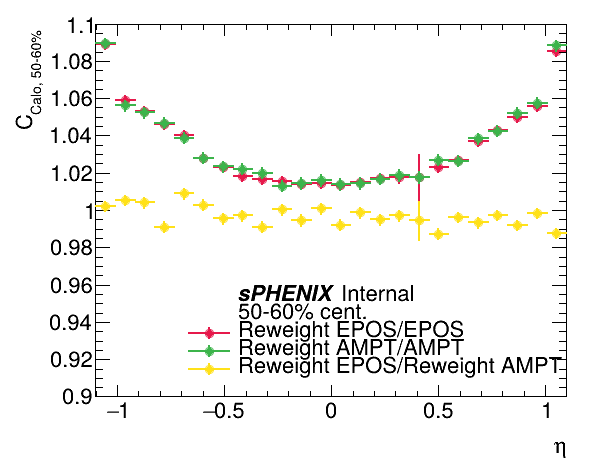

In [343]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.2,.7,.39)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.SetBorderSize(0)
for i in range(len(calo_ratio)):
    leg.AddEntry(calo_ratio[i],reweight_leg_labels[i],"lep")
    calo_ratio[i].SetLineColor(colors[i])
    calo_ratio[i].SetMarkerColor(colors[i])
    calo_ratio[i].SetMarkerStyle(20)
    calo_ratio[i].SetStats(0)
    if i == 0:
        calo_ratio[i].SetYTitle("C_{Calo, "+cent+"%}")
        calo_ratio[i].SetXTitle("#eta")
        calo_ratio[i].GetYaxis().SetRangeUser(0.9,1.1)
        calo_ratio[i].Draw()
    else:
        calo_ratio[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_ratio_'+cent+'.png')